In [10]:
import matplotlib.pyplot as plt
from pymoo.optimize import minimize
from pymoo.problems import get_problem
from pymoo.indicators.igd import IGD
from pymoode.algorithms import GDE3
from pymoode.survival import RankAndCrowding

In [11]:
problem = get_problem("zdt1")
pf = problem.pareto_front()

In [12]:
NGEN = 250
POPSIZE = 100
SEED = 5

In [13]:
gde3 = GDE3(
    pop_size=POPSIZE, variant="DE/rand/1/bin", CR=0.5, F=(0.0, 0.9), de_repair="bounce-back",
    survival=RankAndCrowding(crowding_func="cd"),
)

res_gde3 = minimize(
    problem,
    gde3,
    ('n_gen', NGEN),
    seed=SEED,
    save_history=False,
    verbose=False,
)

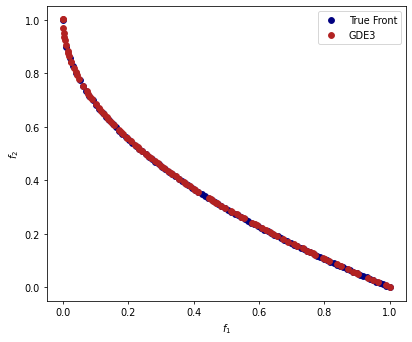

In [14]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=70)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.scatter(res_gde3.F[:, 0], res_gde3.F[:, 1], color="firebrick", label="GDE3")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()

In [15]:
gde3p = GDE3(
    pop_size=POPSIZE, variant="DE/rand/1/bin", CR=0.5, F=(0.0, 0.9), de_repair="bounce-back",
    survival=RankAndCrowding(crowding_func="pcd"),
)

res_gde3p = minimize(
    problem,
    gde3p,
    ('n_gen', NGEN),
    seed=SEED,
    save_history=False,
    verbose=False,
)

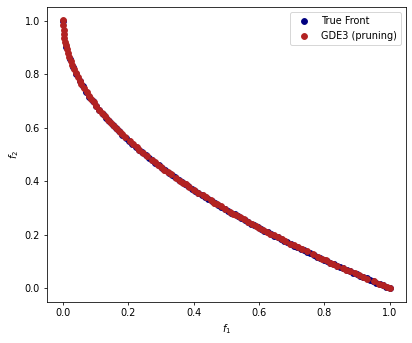

In [16]:
fig, ax = plt.subplots(figsize=[6, 5], dpi=70)
ax.scatter(pf[:, 0], pf[:, 1], color="navy", label="True Front")
ax.scatter(res_gde3p.F[:, 0], res_gde3p.F[:, 1], color="firebrick", label="GDE3 (pruning)")
ax.set_ylabel("$f_2$")
ax.set_xlabel("$f_1$")
ax.legend()
fig.tight_layout()
plt.show()

In [17]:
igd = IGD(pf=problem.pareto_front(), zero_to_one=True)
print("IGD of GDE3 with normal crowding distances: ", igd.do(res_gde3.F))
print("IGD of GDE3 with pruning nds crowding distances: ", igd.do(res_gde3p.F))

IGD of GDE3 with normal crowding distances:  0.004655213028855366
IGD of GDE3 with pruning nds crowding distances:  0.003845947158005016
